In [87]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from rouge_score import rouge_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from itertools import combinations
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import ast
from bs4 import BeautifulSoup
import contractions
import re
import swifter
import warnings
warnings.filterwarnings("ignore")

In [56]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()
    text = contractions.fix(text)
    text = re.sub(r'\\', '', text)
    tokens = word_tokenize(text.lower()) 
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()]  
    tokens = [word for word in tokens if word not in stop_words]  
    return ' '.join(tokens)

In [76]:
S1=pd.read_csv('1S.csv')
S2=pd.read_csv('2S.csv')
S3=pd.read_csv('3S.csv')
S4=pd.read_csv('4S.csv')
S5=pd.read_csv('5S.csv')
S6=pd.read_csv('6S.csv')

In [13]:
PR= pd.read_csv('PageRank.csv')
PR=PR.iloc[:2500]

In [79]:
summary_df['preprocessed_sentence'] = summary_df['Summary'].apply(preprocess_text)

In [77]:
dataframes = [S1, S2, S3, S4, S5, S6]

for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].swifter.apply(preprocess_text)


Pandas Apply:   0%|          | 0/2500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2500 [00:00<?, ?it/s]

C:\Users\akvnr\AppData\Local\Temp\ipykernel_9400\334270769.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


Pandas Apply:   0%|          | 0/2500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2500 [00:00<?, ?it/s]

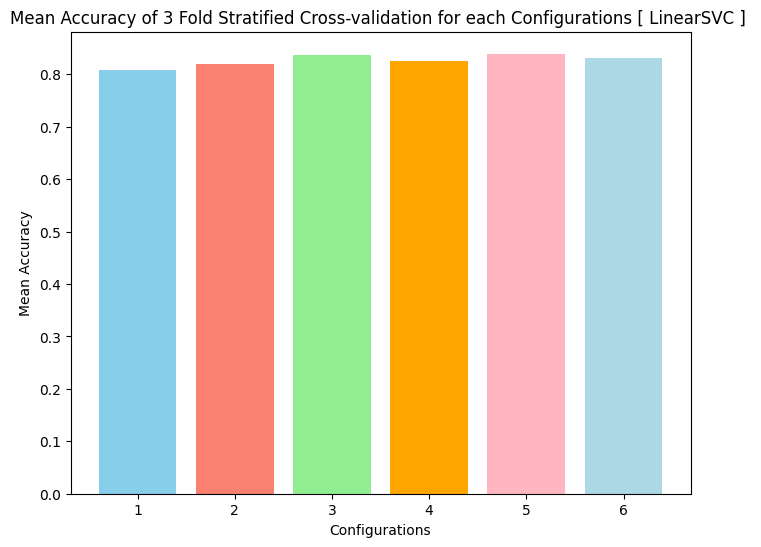

In [86]:
accuracy = []
pipeline = make_pipeline(TfidfVectorizer(), LinearSVC())
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores.mean())

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightpink', 'lightblue']
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(dataframes) + 1), accuracy, color=colors)
plt.xlabel('Configurations')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of 3 Fold Stratified Cross-validation for each Configurations [ LinearSVC ] ')
plt.xticks(range(1, len(dataframes) + 1))
plt.show()


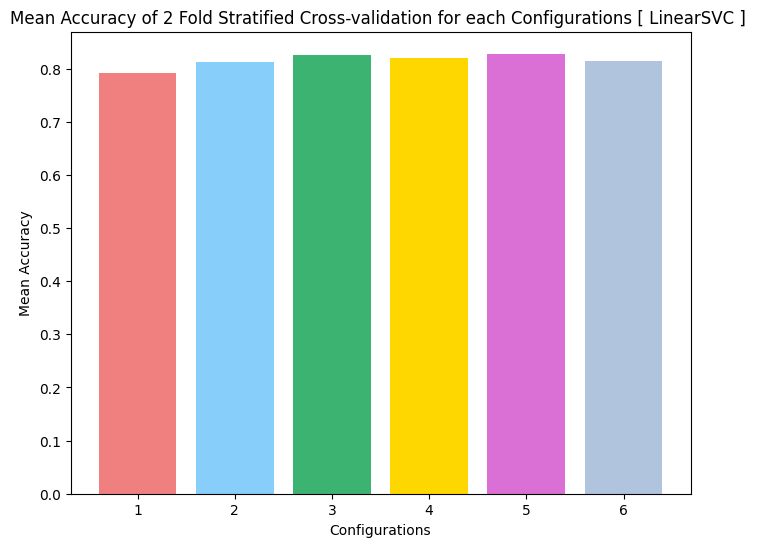

In [88]:
accuracy = []
pipeline = make_pipeline(TfidfVectorizer(), LinearSVC())
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores.mean())

colors = ['lightcoral', 'lightskyblue', 'mediumseagreen', 'gold', 'orchid', 'lightsteelblue']
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(dataframes) + 1), accuracy, color=colors)
plt.xlabel('Configurations')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of 2 Fold Stratified Cross-validation for each Configurations [ LinearSVC ] ')
plt.xticks(range(1, len(dataframes) + 1))
plt.show()


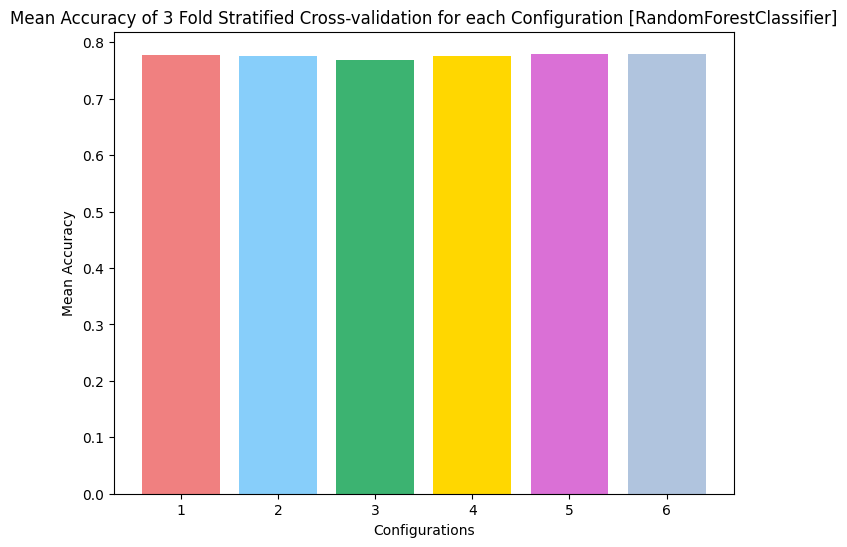

In [91]:

accuracy = []

pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores.mean())

colors = ['lightcoral', 'lightskyblue', 'mediumseagreen', 'gold', 'orchid', 'lightsteelblue']
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(dataframes) + 1), accuracy, color=colors)
plt.xlabel('Configurations')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of 3 Fold Stratified Cross-validation for each Configuration [RandomForestClassifier]')
plt.xticks(range(1, len(dataframes) + 1))
plt.show()


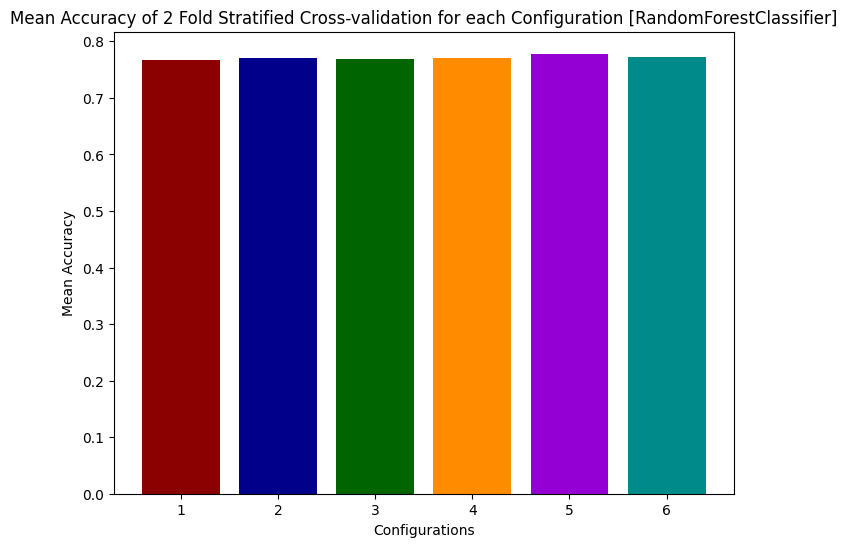

In [93]:
accuracy = []

pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores.mean())

colors = ['darkred', 'darkblue', 'darkgreen', 'darkorange', 'darkviolet', 'darkcyan']
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(dataframes) + 1), accuracy, color=colors)
plt.xlabel('Configurations')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of 2 Fold Stratified Cross-validation for each Configuration [RandomForestClassifier]')
plt.xticks(range(1, len(dataframes) + 1))
plt.show()

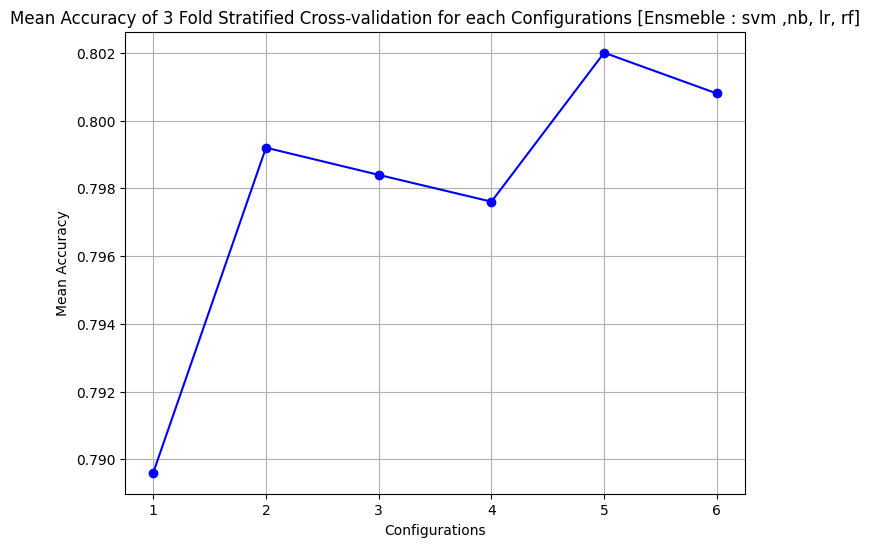

In [95]:
model1 = ('svm', LinearSVC())
model2 = ('nb', MultinomialNB())
model3 = ('lr', LogisticRegression())
model4 = ('rf', RandomForestClassifier())

ensemble_models = [model1, model2, model3, model4]
ensemble_classifier = VotingClassifier(estimators=ensemble_models, voting='hard')
pipeline = make_pipeline(TfidfVectorizer(), ensemble_classifier)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

accuracy = []
for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores.mean())

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(dataframes) + 1), accuracy, marker='o', color='blue', linestyle='-')
plt.xlabel('Configurations')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of 3 Fold Stratified Cross-validation for each Configurations [Ensmeble : svm ,nb, lr, rf]')
plt.xticks(range(1, len(dataframes) + 1))
plt.grid(True)
plt.show()


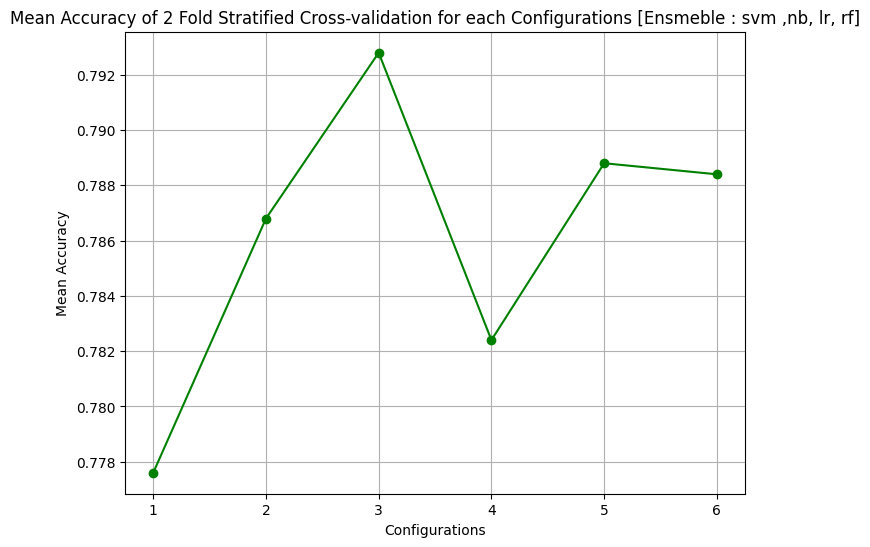

In [96]:
model1 = ('svm', LinearSVC())
model2 = ('nb', MultinomialNB())
model3 = ('lr', LogisticRegression())
model4 = ('rf', RandomForestClassifier())

ensemble_models = [model1, model2, model3, model4]
ensemble_classifier = VotingClassifier(estimators=ensemble_models, voting='hard')
pipeline = make_pipeline(TfidfVectorizer(), ensemble_classifier)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

accuracy = []
for df in dataframes:
    df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
    cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
    accuracy.append(cv_scores.mean())

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(dataframes) + 1), accuracy, marker='o', color='green', linestyle='-')
plt.xlabel('Configurations')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy of 2 Fold Stratified Cross-validation for each Configurations [Ensmeble : svm ,nb, lr, rf]')
plt.xticks(range(1, len(dataframes) + 1))
plt.grid(True)
plt.show()


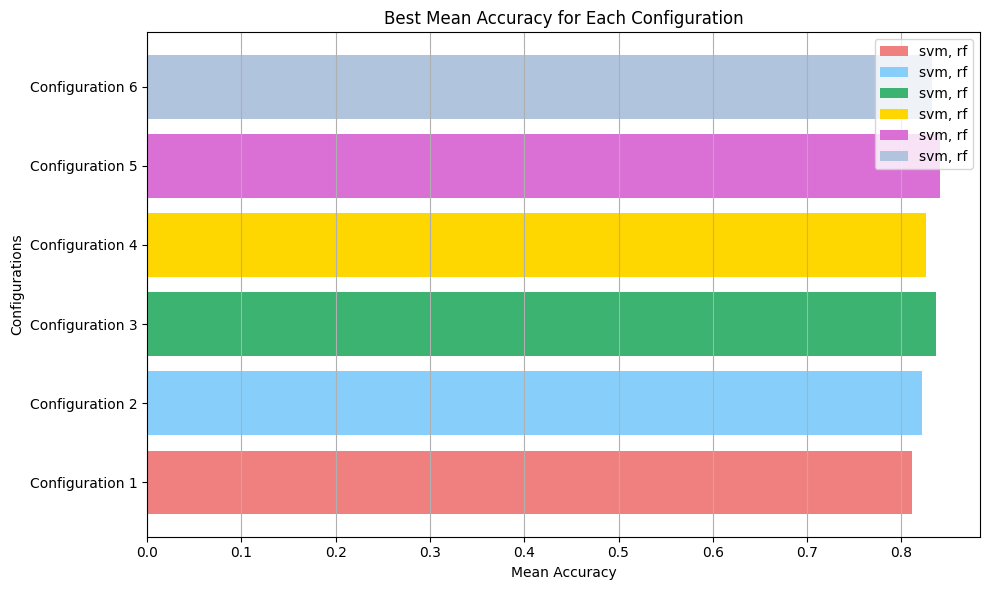

In [99]:
import itertools
models = [
    ('svm', LinearSVC()),
    ('nb', MultinomialNB()),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
]
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_combinations = []
best_scores = []

for df in dataframes:
    best_score = 0
    best_combination = None
    
    for i in range(2, len(models) + 1):
        for model_combination in itertools.combinations(models, i):
            model_combination_list = list(model_combination)
            ensemble_classifier = VotingClassifier(estimators=model_combination_list, voting='hard')
            pipeline = make_pipeline(TfidfVectorizer(), ensemble_classifier)
            df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
            cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
            mean_accuracy = cv_scores.mean()
            if mean_accuracy > best_score:
                best_score = mean_accuracy
                best_combination = model_combination_list
    
    best_combinations.append(best_combination)
    best_scores.append(best_score)

colors = ['lightcoral', 'lightskyblue', 'mediumseagreen', 'gold', 'orchid', 'lightsteelblue']

plt.figure(figsize=(10, 6))
for i, (combination, score) in enumerate(zip(best_combinations, best_scores), start=1):
    model_names = [model[0] for model in combination]
    model_str = ', '.join(model_names)
    plt.barh(i, score, color=colors[i-1], label=model_str)

plt.xlabel('Mean Accuracy')
plt.ylabel('Configurations')
plt.title('Best Mean Accuracy for Each Configuration')
plt.yticks(range(1, len(dataframes) + 1), [f'Configuration {i}' for i in range(1, len(dataframes) + 1)])
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

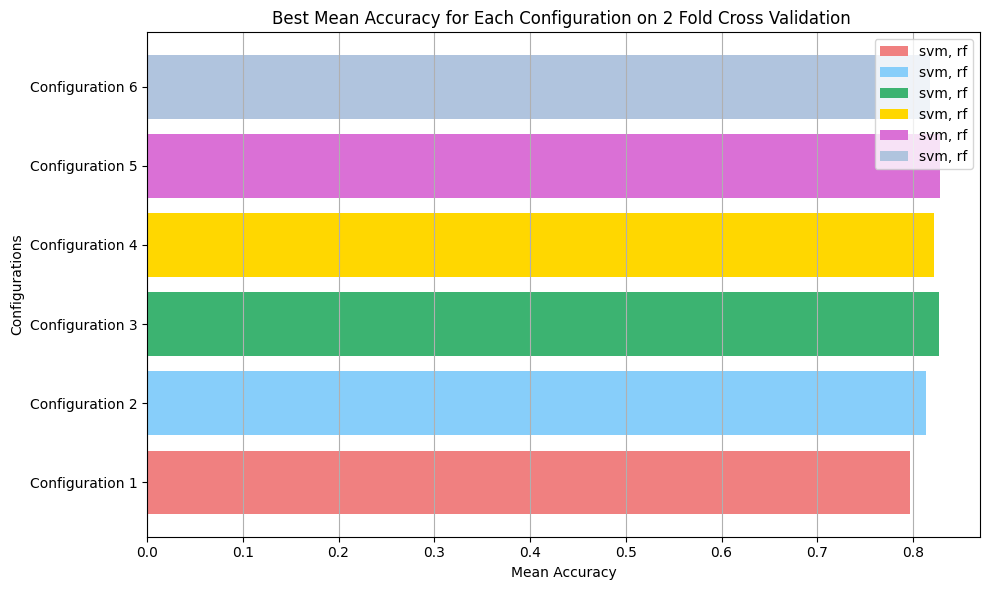

In [100]:
import itertools
models = [
    ('svm', LinearSVC()),
    ('nb', MultinomialNB()),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier())
]
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

best_combinations = []
best_scores = []

for df in dataframes:
    best_score = 0
    best_combination = None
    
    for i in range(2, len(models) + 1):
        for model_combination in itertools.combinations(models, i):
            model_combination_list = list(model_combination)
            ensemble_classifier = VotingClassifier(estimators=model_combination_list, voting='hard')
            pipeline = make_pipeline(TfidfVectorizer(), ensemble_classifier)
            df['preprocessed_sentence'] = df['Summary'].apply(preprocess_text)
            cv_scores = cross_val_score(pipeline, df['preprocessed_sentence'], df['TBLabel'], cv=cv)
            mean_accuracy = cv_scores.mean()
            if mean_accuracy > best_score:
                best_score = mean_accuracy
                best_combination = model_combination_list
    
    best_combinations.append(best_combination)
    best_scores.append(best_score)

colors = ['lightcoral', 'lightskyblue', 'mediumseagreen', 'gold', 'orchid', 'lightsteelblue']

plt.figure(figsize=(10, 6))
for i, (combination, score) in enumerate(zip(best_combinations, best_scores), start=1):
    model_names = [model[0] for model in combination]
    model_str = ', '.join(model_names)
    plt.barh(i, score, color=colors[i-1], label=model_str)

plt.xlabel('Mean Accuracy')
plt.ylabel('Configurations')
plt.title('Best Mean Accuracy for Each Configuration on 2 Fold Cross Validation ')
plt.yticks(range(1, len(dataframes) + 1), [f'Configuration {i}' for i in range(1, len(dataframes) + 1)])
plt.legend()
plt.grid(axis='x')
plt.tight_layout()
plt.show()